# Import the modules

In [9]:
import tarfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
%matplotlib inline

# Import the data

In [10]:
DATA_FOLDER = 'Data/'
CHARACTER_DATASET = DATA_FOLDER + 'character.metadata.tsv'
NLP_DATASET = DATA_FOLDER + 'corenlp_plot_summaries.tar'
MOVIE_DATASET = DATA_FOLDER + 'Movie.metadata.tsv'
SUMMARIES_DATASET = DATA_FOLDER + 'plot_summaries.txt.gz'
DEFAULT_COMPRESSION = 'gzip'

In [11]:
def load_metadata(path, column_names, header=None, low_memory=False):
    return pd.read_table(path, header=header, names=column_names)

In [12]:
columns_character = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_release_date', 'Character_name', 'Actor_date_of_birth', 'Actor_gender', 'Actor_height_meters', 'Actor_ethnicity_Freebase_ID', 'Actor_name', 'Actor_age_at_movie_release', 'Freebase_character_actor_map_ID', 'Freebase_character_ID', 'Freebase_actor_ID']
columns_movie = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name','Movie_release_date','Movie_box_office_revenue', 'Movie_runtime','Movie_languages','Movie_countries','Movie_genres' ]

characters = load_metadata(CHARACTER_DATASET,column_names=columns_character)
movies = load_metadata(MOVIE_DATASET,column_names=columns_movie)

In [13]:
movies.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [35]:
characters.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_meters,Actor_ethnicity_Freebase_ID,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_map_ID,Freebase_character_ID,Freebase_actor_ID
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
56,2314463,/m/0734w5,2006,Taper Guy,1971-05-26,M,1.870,/m/033tf_,Matt Stone,34.0,/m/0cgn0lx,/m/0h0z488,/m/01_x6d
76,612710,/m/02wjqm,1999-10-01,Sandii,1975-09-20,F,1.680,/m/0222qb,Asia Argento,24.0,/m/02vcxk_,/m/0h2l6rx,/m/028pzq


# Cleaning

## Drop NaN values

In [14]:
characters = characters.dropna()
movies = movies.dropna()

## Problem of date

Typo in the release date of the movie, but this movie is not in characters

In [38]:
movies.loc[movies.Movie_release_date == '1010-12-02','Movie_release_date'] = '2010-12-02'

In [39]:
movies[movies.Movie_release_date == '2010-12-02']

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
62836,29666067,/m/0fphzrf,Hunting Season,2010-12-02,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]"


## Format of movie languages, genres and country

In [27]:
def format_multiple(chain,deb,step):
    res = chain.split('"')[deb::step]
    return res

In [28]:
movies.Movie_genres = movies.Movie_genres.apply(format_multiple,deb=3,step=4)
movies.Movie_countries = movies.Movie_countries.apply(format_multiple,deb=3,step=4)
movies.Movie_languages = movies.Movie_languages.apply(format_multiple,deb=3,step=4)

In [29]:
movies[movies.Movie_genres.apply(len) == 0]

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
44125,36745727,/m/0l8h5rw,Beverly Hills Chihuahua 3,2012-09-18,8666941.0,89.0,[],[],[]
62031,2853134,/m/086yk3,Pagal Nilavu,1985,50000.0,141.0,[Tamil Language],[India],[]
62215,31492948,/m/0jt6hrm,Pilot Season,1995-10-19,2122561.0,94.0,[English Language],[United States of America],[]


In [34]:
keys = ['Movie_languages','Movie_countries','Movie_genres']
for key in keys:
    nb = len(movies[movies[key].apply(len) == 0])
    print('{nb} movies without {key} ({percentage:.2f}\% of the dataset)'.format(nb=nb,key=key, percentage=nb*100/len(movies)))

243 movies without Movie_languages (2.95\% of the dataset)
75 movies without Movie_countries (0.91\% of the dataset)
3 movies without Movie_genres (0.04\% of the dataset)


## Format for dates

In [49]:
movies.Movie_release_date = pd.to_datetime(movies.Movie_release_date)
characters.Movie_release_date = pd.to_datetime(characters.Movie_release_date)
characters.Actor_date_of_birth = pd.to_datetime(characters.Actor_date_of_birth)

# Visualisations

## Movies

<AxesSubplot: >

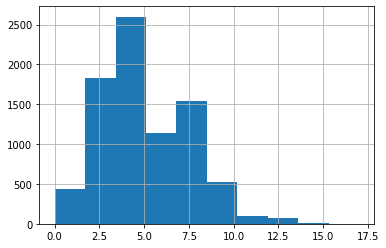

In [11]:
# nb of languages
movies.Movie_genres.apply(len).hist()

In [12]:
#movies_by_year = movies.sort_values(by=movies.st_time.dt.year,ascending=True)
#plt.plot(movies_by_date['Movie_release_date'],movies_by_date['Movie_box_office_revenue'])
movies = movies[movies.Movie_release_date != '1010-12-02']
movies.Movie_release_date = pd.to_datetime(movies.Movie_release_date, format='%Y-%m-%d').dt.year
movies_by_year = movies.groupby(movies.Movie_release_date)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

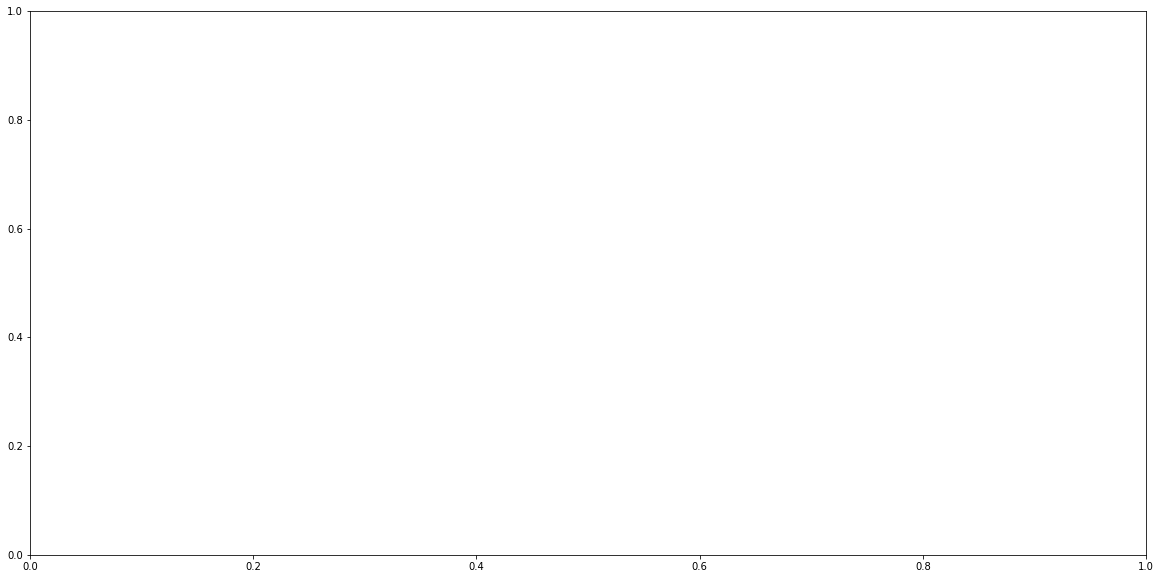

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(movies_by_year.agg('count').index, movies_by_year.agg('count').Movie_name,ax=ax)
plt.title('Number of films per year')
plt.xticks(rotation=90)
None

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(movies_by_year.agg('count').index, movies_by_year.agg('sum').Movie_box_office_revenue,ax=ax)
ax.set(yscale='log')
plt.title('Box office revenue per year (log-lin)')
plt.xticks(rotation=90)
None

In [14]:
movies[(dates[4*i+j+1] > movies.Movie_release_date)]

NameError: name 'dates' is not defined

<ipython-input-81-2909644b4372>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_range_date['Movie_genres'] = movies_range_date['Movie_genres'].apply(lambda x:x[0])


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

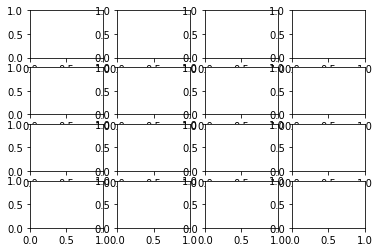

In [81]:
fig,axs = plt.subplots(4,4)
dates = np.linspace(1914,2012,16)
for i in range(4):
    for j in range(3):
        movies_range_date = movies[(dates[4*i+j] <= movies.Movie_release_date) & (dates[4*i+j+1] > movies.Movie_release_date)]
        movies_range_date['Movie_genres'] = movies_range_date['Movie_genres'].apply(lambda x:x[0])
        sns.barplot(movies_range_date.Movie_genres)


## Characters

In [15]:
characters.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_meters,Actor_ethnicity_Freebase_ID,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_map_ID,Freebase_character_ID,Freebase_actor_ID
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
56,2314463,/m/0734w5,2006,Taper Guy,1971-05-26,M,1.870,/m/033tf_,Matt Stone,34.0,/m/0cgn0lx,/m/0h0z488,/m/01_x6d
76,612710,/m/02wjqm,1999-10-01,Sandii,1975-09-20,F,1.680,/m/0222qb,Asia Argento,24.0,/m/02vcxk_,/m/0h2l6rx,/m/028pzq


In [16]:
characters_per_actor = characters.groupby('Actor_name')

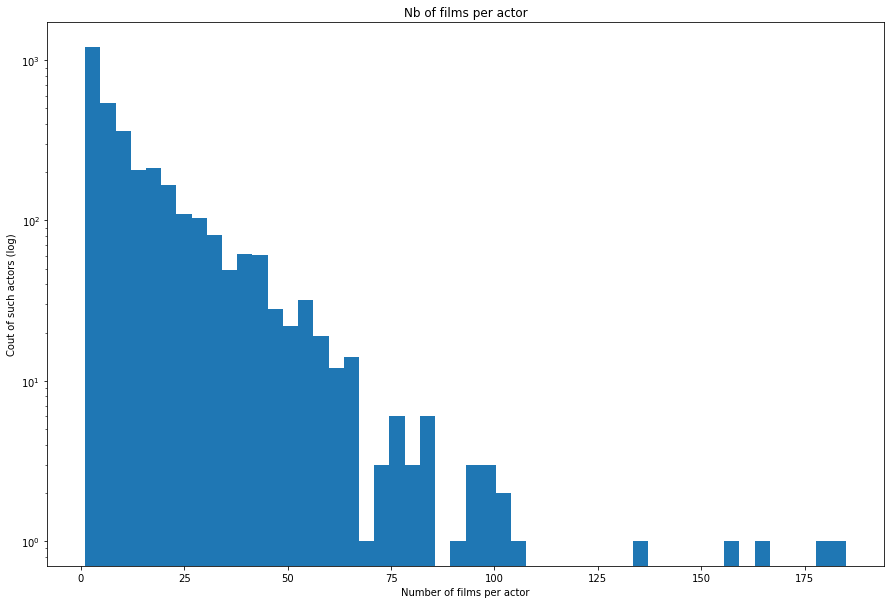

In [17]:
fig,ax = plt.subplots(figsize=(15,10))
plt.hist(characters_per_actor.agg('count').Wikipedia_movie_ID,bins=50)
ax.set(yscale='log')
plt.title('Nb of films per actor')
plt.xlabel('Number of films per actor')
plt.ylabel('Cout of such actors (log)')
None